In [20]:
from google.colab import files
uploaded = files.upload()

Saving queries.csv to queries (1).csv


In [0]:
import io
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx
import pylab

In [0]:
class Node:
  def __init__(self, name):
    self.name = name
    self.edges = {}
    self.isEnd = False
    self.value = ""

In [0]:
df = pd.read_csv('Vegetatiuon-Table.csv', header = None)
dftest = pd.read_csv('queries (1).csv', header = None)
fields = df.iloc[0:1, 0:]
data = df.iloc[1:, 1:]
testdata = dftest.iloc[1:, 1:dftest.shape[1] - 1]
data1 = data
del data1[1]
data2 = data
del data2[2]
data3 = data
del data3[3]

In [0]:
def entropyFunc(data, col):
  datadict = dict(data[col].value_counts())
  H = 0.0
  N = len(data)
  for x in datadict:
    H = H + datadict[x] * math.log2(datadict[x] / N)
  H = -H / N
  return H

In [0]:
def remainderFunc(data, col):
  datadict = dict(data[col].value_counts())
  N = len(data)
  R = 0
  for x in datadict:
    dset = data.loc[data[col] == x]
    R = R + len(dset) * entropyFunc(dset, df.shape[1] - 1)
  R = R / N
  return R    

In [0]:
def makeDecisionTree(data, names, level):
  global list_for_graph
  indexes = list(data)
  cols = data.shape[1]
  target = indexes[-1]
  H = entropyFunc(data, target)
  if (H == 0):
    print(data.iloc[0:1, cols-1:cols].values[0][0])
    node = Node(target)
    node.isEnd = True
    node.value = data.iloc[0:1, cols-1:cols].values[0][0]
    return node
  IGlist = []
  for ind in indexes[0 : cols - 1]:
    IGlist.append(H - remainderFunc(data, ind))
  ind = indexes[IGlist.index(max(IGlist))]
  datadict = dict(data[ind].value_counts())
  node = Node(ind)
  for x in datadict:
    print(names[ind].values[0] + "(" + x + ")" + " -> ", end = '')
    dset = data.loc[data[ind] == x]
    del dset[ind]
    node.edges[x] = makeDecisionTree(dset, names, level + 1)
    temp = node.edges[x]
    if (temp.isEnd == True):
      list_for_graph.append([(names[ind].values[0] + str(level), temp.value + str(level + 1)), x])
    else:
      list_for_graph.append([(names[ind].values[0] + str(level), fields[temp.name].values[0] + str(level + 1)), x])
  return node

In [0]:
def makeDecisionTreeCG5(data, names, level):
  global list_for_graph2
  indexes = list(data)
  cols = data.shape[1]
  target = indexes[-1]
  H = entropyFunc(data, target)
  if (H == 0):
    print(data.iloc[0:1, cols-1:cols].values[0][0])
    node = Node(target)
    node.isEnd = True
    node.value = data.iloc[0:1, cols-1:cols].values[0][0]
    return node
  IGlist = []
  for ind in indexes[0 : cols - 1]:
    IGlist.append((H - remainderFunc(data, ind)) / entropyFunc(data, ind)) 
  ind = indexes[IGlist.index(max(IGlist))]
  datadict = dict(data[ind].value_counts())
  node = Node(ind)
  for x in datadict:
    print(names[ind].values[0] + "(" + x + ")" + " -> ", end = '')
    dset = data.loc[data[ind] == x]
    del dset[ind]
    node.edges[x] = makeDecisionTreeCG5(dset, names, level + 1)
    temp = node.edges[x]
    if (temp.isEnd == True):
      list_for_graph2.append([(names[ind].values[0] + str(level), temp.value + str(level + 1)), x])
    else:
      list_for_graph2.append([(names[ind].values[0] + str(level), fields[temp.name].values[0] + str(level + 1)), x])
  return node

In [0]:
def printDecisionTree(node):
  if (node.isEnd):
    print(node.value)
    return
  print(fields[node.name].values[0] + " -> ", end = ' ')
  for x in node.edges:
    printDecisionTree(node.edges[x])

In [0]:
def predictValue(data, node):
  if (node.isEnd):
    return node.value
  return predictValue(data, node.edges[data[node.name].values[0]])

In [23]:
list_for_graph = []
list_for_graph2 = []
root1 = makeDecisionTree(data1, fields, 0)
print("\n\n")
root2 = makeDecisionTreeCG5(data, fields, 0)
printDecisionTree(root2)

ValueError: ignored

Output according to Decision Tree formed by ID3 algorithm
carrot
carrot
raddish


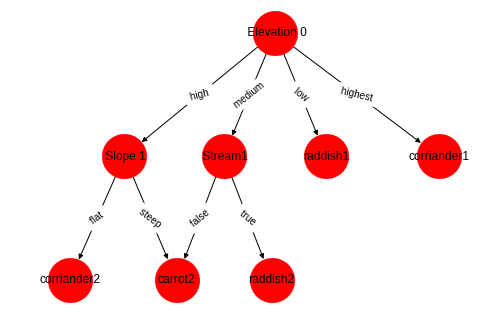

In [11]:
print("Output according to Decision Tree formed by ID3 algorithm")
for i in range(testdata.shape[0]):
  print(predictValue(testdata.iloc[i:i+1, :], root1))
G = nx.DiGraph()
edge_labels = {}
for node in list_for_graph:
    G.add_edges_from([node[0]])
    edge_labels[node[0]]=node[1]

pos = nx.drawing.nx_agraph.graphviz_layout(G,prog='dot')
#pos = nx.shell_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos,node_size=2000,with_labels=True)
pylab.show()

Output according to Decision Tree formed by CG5 algorithm
raddish
carrot
corriander


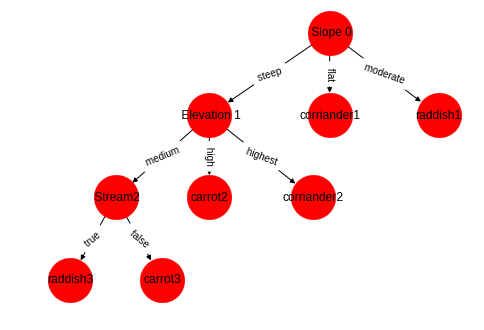

In [20]:
print("Output according to Decision Tree formed by CG5 algorithm")
for i in range(testdata.shape[0]):
  print(predictValue(testdata.iloc[i:i+1, :], root2))
G2 = nx.DiGraph()
edge_labels = {}
for node in list_for_graph2:
    G2.add_edges_from([node[0]])
    edge_labels[node[0]]=node[1]

pos = nx.drawing.nx_agraph.graphviz_layout(G2,prog='dot')
#pos = nx.shell_layout(G2)
nx.draw_networkx_edge_labels(G2,pos,edge_labels=edge_labels)
nx.draw(G2,pos,node_size=2000,with_labels=True)
pylab.show()